<a href="https://colab.research.google.com/github/kimsooyoung/pytorch_til/blob/main/youtube_series/1_introduction_to_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

몇 가지 기본적인 tensor 조작을 알아보겠습니다. 처음으로, tensor들을 만드는 몇 가지 방법을 살펴보겠습니다:

In [ ]:
z = torch.zeros(5, 3)
print(z)
print(z.type)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
<built-in method type of Tensor object at 0x7e679014b010>


위에서, 0으로 채워진 5x3 행렬을 만들고, 파이토치의 **기본 타입인, 0으로 채워진 32비트 부동소수점** 데이터 타입인지 확인합니다.


> 만약 정수형 데이터 타입을 원한다면 기본값을 재정의할 수 있습니다:

In [ ]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


dtype의 기본값을 변경하면 tensor가 출력될 때 데이터 타입을 확인할 수 있습니다.


학습 가중치를 무작위로 초기화하는 것이 일반적이며, 종종 결과의 재현성을 위해 PRNG에 대한 특정 시드로 초기화합니다.

In [ ]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('랜덤 tensor 값:')
print(r1)

r2 = torch.rand(2, 2)
print('\n다른 랜덤 tensor 값:')
print(r2) # 새로운 2x2 행렬 값

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nr1과 일치:')
print(r3) # 동일한 시드값으로 인해 r1 값이 반복되어 행렬값으로 나옵니다.

랜덤 tensor 값:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

다른 랜덤 tensor 값:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

r1과 일치:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


PyTorch tensor는 산술 연산을 직관적으로 수행합니다. 유사한 shape의 tensor들이 더하거나 곱하거나 그 외 연산도 가능합니다. 스칼라를 사용한 연산은 tensor에 분산됩니다.

In [ ]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2
print(twos)

threes = ones + twos
print(threes)
print(threes.shape)

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# 런타임 오류를 발생시키려면 아래 줄의 주석을 해제합니다.
# r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


다음은 사용 가능한 작은 수학 연산 예제 입니다:



In [ ]:
r = (torch.rand(2, 2) - 0.5) * 2 # -1과 1 사이의 값을 가집니다.
print('랜덤 행렬값, r:')
print(r)

# 일반적인 수학적 연산은 다음과 같이 지원됩니다:
print('\nr의 절대값:')
print(torch.abs(r))

# 삼각함수를 사용할 수 있습니다:
print('\nr의 역 사인 함수:')
print(torch.asin(r))

# 행렬식 및 특이값 분해와 같은 선형 대수 연산을 사용할 수 있습니다.
print('\nr의 행렬식:')
print(torch.det(r))
print('\nr의 특이값 분해:')
print(torch.svd(r))

# 통계 및 집합 연산 등을 사용할 수 있습니다:
print('\nr의 평균 및 표준편차:')
print(torch.std_mean(r))
print('\nr의 최대값:')
print(torch.max(r))

랜덤 행렬값, r:
tensor([[ 0.9956, -0.2232],
        [ 0.3858, -0.6593]])

r의 절대값:
tensor([[0.9956, 0.2232],
        [0.3858, 0.6593]])

r의 역 사인 함수:
tensor([[ 1.4775, -0.2251],
        [ 0.3961, -0.7199]])

r의 행렬식:
tensor(-0.5703)

r의 특이값 분해:
torch.return_types.svd(
U=tensor([[-0.8353, -0.5497],
        [-0.5497,  0.8353]]),
S=tensor([1.1793, 0.4836]),
V=tensor([[-0.8851, -0.4654],
        [ 0.4654, -0.8851]]))

r의 평균 및 표준편차:
(tensor(0.7217), tensor(0.1247))

r의 최대값:
tensor(0.9956)


GPU에서 병렬 연산을 위해 설정하는 방법을 포함하여 PyTorch tensor의 강력함에 대해 알아야 할 것이 있습니다. 이 내용은 다른 영상에서 자세히 살펴보겠습니다.

## PyTorch Models


PyTorch에서 Model을 표현할 수 있는 방법에 대해 알아보겠습니다.

In [ ]:
import torch                     # PyTorch 모든 모듈 가져오기
import torch.nn as nn            # torch.nn.Module의 경우 PyTorch model의 부모 객체
import torch.nn.functional as F  # 활성화 함수 모듈 가져오기

![](https://tutorials.pytorch.kr/_images/mnist.png)

LeNet-5가 어떻게 동작하는지에 대한 간단한 설명은 다음과 같습니다:

- 계층 C1은 합성곱 계층입니다. 즉, 입력 이미지에서 학습 중에 배웠던 특징을 검색합니다. 이미지에서 학습된 각 특징을 위치에 대한 출력 맵을 보여줍니다. 이 “활성화 맵” 으로 S2 계층에서 다운샘플링됩니다.
- 계층 C3는 다른 합성곱 계층으로, 이 시점은 특징들의 조합 을 위해 C1 활성화 맵 검색합니다. 또한, 계층 S4에서 다운샘플링된 이러한 특징 조합의 spatial locations을 제공합니다.
- 마지막으로, 완전 연결 계층(fully-connected layers)인 F5, F6, OUTPUT은 최종 활성화 맵을 가져와 십진수를 표현하는 10개의 bin 중 하나로 분류 하는 분류기입니다.

> 이 간단한 신경망을 코드로 어떻게 표현할 수 있을까요?



In [ ]:
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 입력 이미지 채널, 6개의 output 채널, 5x5 정방 합성곱 커널을 사용합니다.
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 아핀 변환: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5x5 이미지 차원
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 최대 풀링은 (2, 2) 윈도우 크기를 사용합니다.
        # CONV, RELU, MAX POOLING
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # 크기가 정방 사이즈인 경우, 단일 숫자만 지정할 수 있습니다.
        # 다시 CONV, RELU, MAX POOLING
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # 한줄로 펴기
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # 크기는 배치 차원을 제외한 모든 차원을 가져옵니다.
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

32 * 32 * 1 => 6 * 28 * 28이 되고, stride=1이기 때문에 아래 수식에 따라서 커널 채널은 5 * 5가 됨
- (32 - 5) / 1 + 1 = 28

6 * 28 * 28에 stride=2인 pooling 적용하면 6 * 14 * 14가 되고, 6 * 14 * 14에 stride=1인 5 * 5 커널 적용하면 또 16 * 10 * 10이 된다.
- (14 - 5)/1 + 1 = 10

> 자 이제 만든 오브젝트를 인스턴스화하고 샘플 입력을 통해 실행합니다.



In [ ]:
net = LeNet()
print(net)                         # 인스턴스한 객체를 출력하면 어떤 값을 보여줄까요?

input = torch.rand(1, 1, 32, 32)   # 32x32 크기의 1채널의 흑백 이미지를 만듭니다.
print('\n이미지 배치 shape:')
print(input.shape)

output = net(input)                # 객체로부터 직접 forward() 함수를 호출하지 않습니다.
print('\n:결과 값')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

이미지 배치 shape:
torch.Size([1, 1, 32, 32])

:결과 값
tensor([[ 0.0898,  0.0318,  0.1485,  0.0301, -0.0085, -0.1135, -0.0296,  0.0164,
          0.0039,  0.0616]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


(모델의 인스턴스는 아직 아무것도 학습하지 않았기 때문에 출력에서 좋은 결과를 기대해서는 안 됩니다) output 결과를 확인해보면 batch 차원을 가지고 있다는 것을 알 수 있는데, 크기는 항상 입력 batch 차원과 일치해야 합니다. 만약 16개의 인스턴스로 이루어진 입력으로 모델을 통과했다면 output 는 (16, 10) 의 형태를 가지고 있습니다.

## Datasets 및 Dataloaders

아래 예제에서는 TorchVision에서 바로 다운로드할 수 있는 오픈 데이터셋 중 하나를 사용하여 모델을 통해 이미지를 변환하는 방법, DataLoader를 사용하여 모델에 데이터 배치를 제공하는 방법을 학습합니다.

> 첫 번째 할 일은 들어오는 이미지를 Pytorch tensor로 변환하는 것입니다.

In [ ]:
#%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

- `transforms.ToTensor()`는 Pillow 패키지를 사용하여 불러온 이미지를 PyTorch tensor 형태로 변환합니다.

* transforms.Normalize() 는 tensor의 평균이 0.5이고 표준 편차가 0.5가
되도록 tensor의 값을 조정합니다. 대부분의 활성화 함수는 약 x=0에 강한 기울기 값을 가지고 있어 데이터를 중앙으로 집중화하여 학습 속도를 높일 수 있습니다.

> transforms 는 cropping, centering, rotation, reflection를 포함하여 더 많은 변환이 가능합니다.

다음으로 CIFAR10 데이터셋의 인스턴스를 만듭니다. CIFAR10 데이터셋은 동물(새, 고양이, 사슴, 개, 개구리, 말) 6종과 차량(비행기, 자동차, 배, 트럭) 4종의 클래스로 이루어진 데이터셋입니다:

In [ ]:
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True,
    download=True, transform=transform
)

100%|██████████| 170498071/170498071 [00:02<00:00, 63605129.64it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


PyTorch에서 데이터셋 객체를 만드는 예제입니다. 다운로드 가능한 데이터셋 (CIFAR-10과 같은)는 `torch.utils.data.Dataset` 의 하위 클래스입니다. PyTorch의 Dataset 클래스에는 TorchVision, Torchtext 및 TorchAudio 등 다운로드 가능한 데이터셋 뿐 아니라 레이블된 이미지의 폴더를 읽는 `torchvision.datasets`.`ImageFolder` 와 같은 유틸리티 데이터셋 클래스가 포함됩니다. 또한, Dataset 의 하위 클래스를 직접 만들 수 있습니다.

> 데이터셋 다운로드가 끝나면 ``DataLoader``에 사용할 수 있습니다:

In [ ]:
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=4,
    shuffle=True, num_workers=2
)

Dataset 하위 클래스는 데이터 접근에 대한 클래스를 포함하며, 해당 서브 클래스가 제공하는 데이터 유형에 특화되어 있습니다. DataLoader 는 데이터에 대해 아무것도 알지 못하지만 Dataset 이 제공하는 입력 tensor를 사용자가 지정한 파라미터로 구성합니다.


위 예제에서 DataLoader 에서에서 무작위 추출( shuffle=True )한 4개의 batch 이미지를 trainset 에서 추출하고 disk에서 데이터를 로드하기 위해 2개의 workers를 spin up 했습니다.

> DataLoader 가 제공하는 batch 이미지를 시각화 하는것은 좋은 연습입니다:

  car   car   car plane


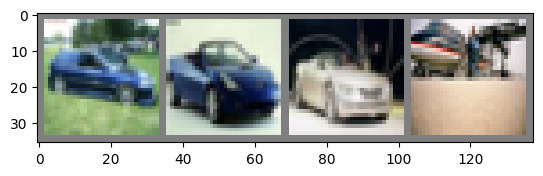

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # 역정규화 => 지금 평균 0.5 표편 0.5로 TRANSFORM 했으므로 반대 연산 시킨 것이다.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 무작위로 학습 이미지 추출하기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# labels 출력하기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## PyTorch 모델 학습

> 위에서 다뤘던 내용들을 종합하여 모델을 학습시키겠습니다:



In [ ]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

첫째로, 학습 및 테스트 데이터셋이 필요합니다. 아직 다운로드하지 않은 경우, 아래 셀을 실행하여 데이터셋이 다운로드 되었는지 확인하세요.(다운로드 시 수 분정도 소요됩니다)

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


DataLoader 출력을 확인해보겠습니다:

horse   dog   car   dog


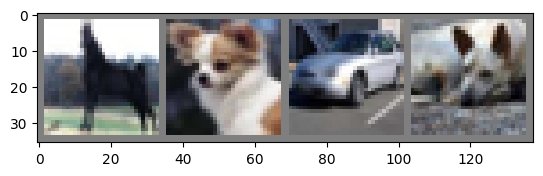

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 아래 함수는 이미지를 시각화하여 보여주는 함수입니다.


def imshow(img):
    img = img / 2 + 0.5     # 역정규화
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 무작위로 학습 이미지를 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 시각화하기
imshow(torchvision.utils.make_grid(images))
# 정답 label 출력하기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

이제 모델을 학습시킬 차례입니다. 만약 모델 구조가 익숙하게 보인다면, 이 모델은 이번 영상에서 앞서 다뤄진 3채널(color) 이미지에 맞게 변형된 LeNet 모델이기 때문입니다.


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

아래는 마지막으로 학습에 필요한 손실 함수 및 최적화 방법입니다.

- 손실 함수(loss function)는 데이터 기반으로 모델이 예측한 정답 값이 얼마나 차이가 나는지를 표현하는 지표입니다. Cross-entropy 손실 함수는 일반적인 분류 모델의 전형적인 손실 함수입니다.

- optimizer 는 학습의 필수요소입니다. 아래 예제에서 간단한 최적화 알고리즘인 stochastic gradient descent 를 구현하겠습니다. SGD 알고리짐은 학습 속도인 (lr) 및 momentum 과 같은 매개 변수 외에도 모델의 모든 학습 가중치 값인 net.parameters() 를 전달하는데, 이 함수는 최적화를 위해 파라미터를 조정합니다.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

마지막으로, 모든 것이 학습 loop에 들어갑니다. 이제 아래 셀을 실행하세요. 실행 시 몇 분 정도 걸릴 수 있습니다:

In [ ]:
# Template

net = Net()
# criterion => LOSS FUNC
# optimizer => SGD

# 데이터셋을 여러 번 반복 학습합니다.
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 데이터를 통해 이미지와 정답값을 받습니다.
        inputs, labels = data

        # 초기 기울기 파라미터를 0으로 설정합니다.

        # forward + backward + optimize

        # epoch 및 loss 값을 출력합니다
        if i % 2000 == 1999:    # 2000 mini-batches 마다 값을 출력합니다
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

In [ ]:
for epoch in range(2):  # 데이터셋을 여러 번 반복 학습합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 데이터를 통해 이미지와 정답값을 받습니다.
        inputs, labels = data

        # 초기 기울기 파라미터를 0으로 설정합니다
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # epoch 및 loss 값을 출력합니다
        running_loss += loss.item()
        if i % 2000 == 1999:    # 2000 mini-batches 마다 값을 출력합니다
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.220
[1,  4000] loss: 1.888
[1,  6000] loss: 1.709
[1,  8000] loss: 1.597
[1, 10000] loss: 1.538
[1, 12000] loss: 1.473
[2,  2000] loss: 1.405
[2,  4000] loss: 1.355
[2,  6000] loss: 1.361
[2,  8000] loss: 1.308
[2, 10000] loss: 1.295
[2, 12000] loss: 1.271
Finished Training


마지막 단계로 모델이 단순하게 학습 데이터셋을 “기억” 하는 것이 아니라 실제로 일반화 학습을 잘 수행하고 있는 확인해야 합니다. 이를 과적합 이라 부르며 일반적으로 데이터셋이 너무 작거나, 모델이 데이터셋 을 올바르게 모델링하는 데 필요한 것보다 더 많은 학습 파라미터 변수를 가지고 있음을 보여줍니다. (일반적인 학습에 충분한 예제가 아닙니다)

위와 같이 데이터셋이 학습 및 테스트 데이터셋으로 분할되는 이유입니다. 모델의 일반성을 테스트하기 위해 학습되지 않은 데이터에 대해 예측하도록 요청합니다:

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('10000개 테스트 이미지에서 모델 정확도: %d %%' % (100 * correct / total))

10000개 테스트 이미지에서 모델 정확도: 56 %
